In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import seaborn as sns
sns.set(color_codes=True) # set seaborn plotting style
plt.rcParams['figure.figsize'] = [16, 4] # set the figure size for the plots
sample_size = 10000

# Plotting Gata Generated by a Multivariate Normal Distribution

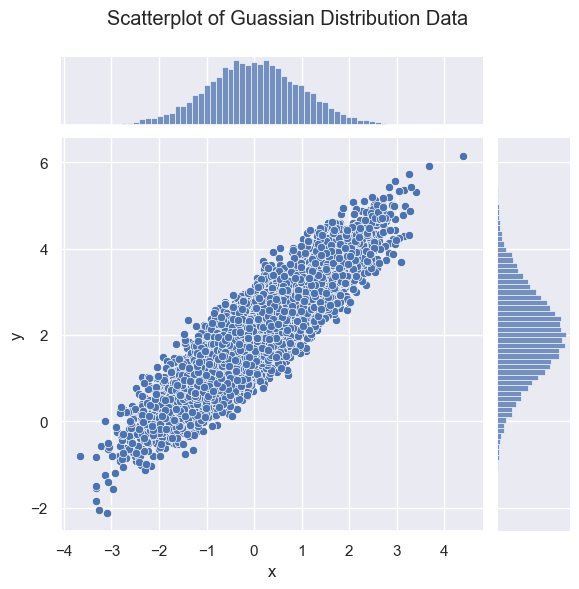

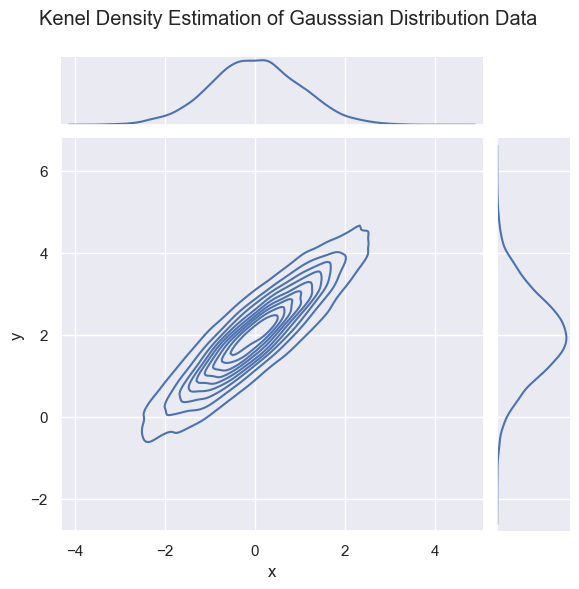

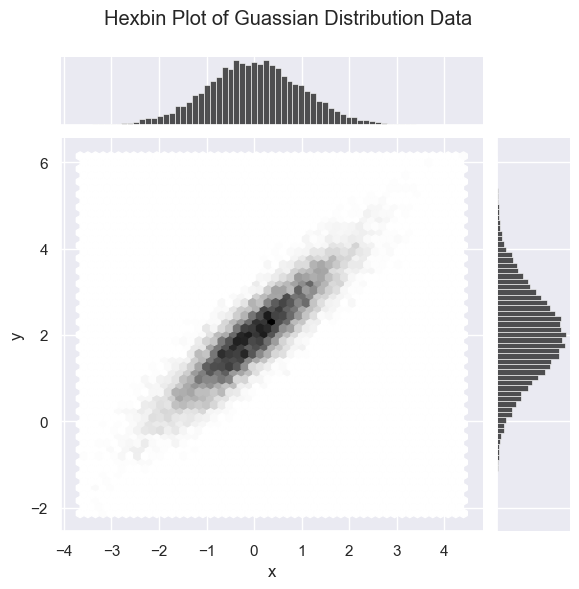

In [7]:
# Generate Mulitvariate Gaussian Data and plot with Seaborn
param_mean = [0, 2]
param_cov = [(1, 0.9), (0.9, 1)]
data = np.random.multivariate_normal(param_mean, param_cov, size=sample_size)
# create a data frame from the data
df = pd.DataFrame(data, columns=["x", "y"])

# Create the Plot
ax = sns.jointplot(x="x", y="y", data=df);
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Scatterplot of Guassian Distribution Data");

ax = sns.jointplot(x="x", y="y", data=df, kind="kde");
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Kenel Density Estimation of Gausssian Distribution Data");

ax = sns.jointplot(x="x", y="y", data=df, kind="hex", color="k");
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Hexbin Plot of Guassian Distribution Data");

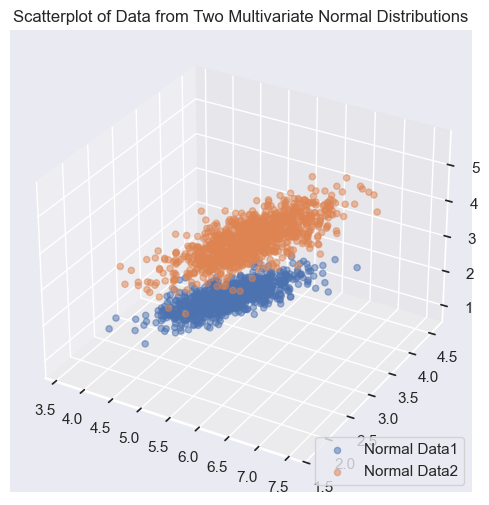

In [8]:
plt.rcParams['figure.figsize'] = [8, 6] # set the figure size for the plots
sample_size = 1000
# 3D scatterplot of data from two 3D  multivariate normal distributions
# mean and cov computed from Fisher's Iris dataset using features 'sepal_length','sepal_width', and 'petal_length'
mu_Iris_setosa = [5.01,3.42,1.46]
cov_Iris_setosa = [(.124249,.100298,0.016139), (.100298,.145180,0.011682),(0.016139,0.011682,0.030106)]
data_setosa = np.random.multivariate_normal(mu_Iris_setosa, cov_Iris_setosa, size=sample_size)
# mean and cov computed from Fisher's Iris dataset using features 'sepal_length','sepal_width', and 'petal_length'
mu_Iris_versicolor = [5.94,2.77,4.26]
cov_Iris_versicolor = [(.2664327,.0851837,.1828980), (.0851837,.0984694,.0826531),(.1828980,.0826531,.2208163)]
data_versicolor = np.random.multivariate_normal(mu_Iris_versicolor, cov_Iris_versicolor, size=sample_size)

ax = plt.axes(projection='3d');
ax.scatter(data_setosa[:,0],data_setosa[:,1],data_setosa[:,2], label='Normal Data1', alpha=0.5);
ax.scatter(data_versicolor[:,0],data_versicolor[:,1],data_versicolor[:,2], label='Normal Data2', alpha=0.5);
ax.legend(loc='lower right');
ax.set_title('Scatterplot of Data from Two Multivariate Normal Distributions');

# Plotting the PDF for a Multivariate Normal Distribution

In [9]:
from scipy.stats import multivariate_normal
# Create the Y,Y grid
X, Y = np.meshgrid(np.arange(-2.5, 3, 0.1), np.arange(-1, 5, 0.1))
pos = np.dstack((X,Y))
# Compute the PDF at the grid values
Z = multivariate_normal.pdf(pos, mean=param_mean, cov=param_cov);

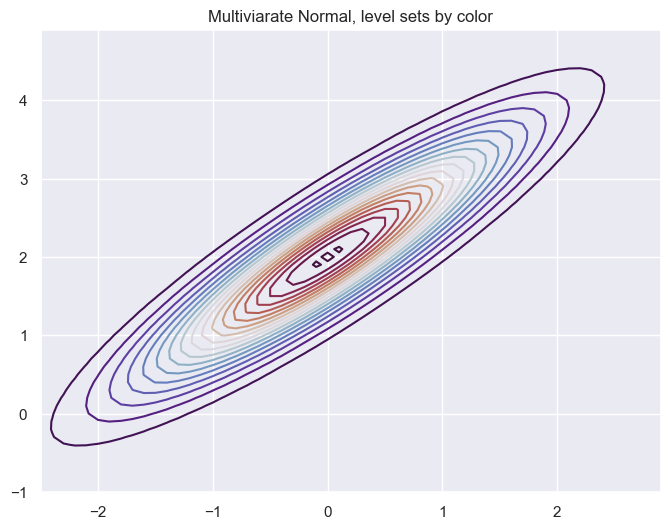

In [10]:
# basic countorplot showing level sets
plt.contour(X, Y, Z, 20, cmap='twilight_shifted');
plt.title('Multiviarate Normal, level sets by color');

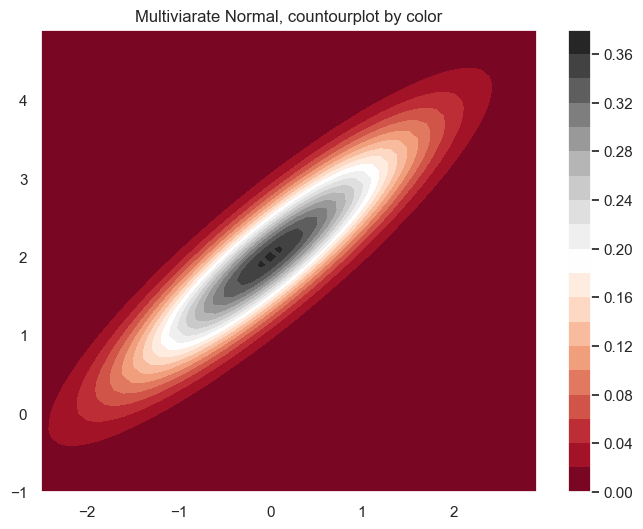

In [11]:
# contourplot using colors to show z-values
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();
plt.title('Multiviarate Normal, countourplot by color');

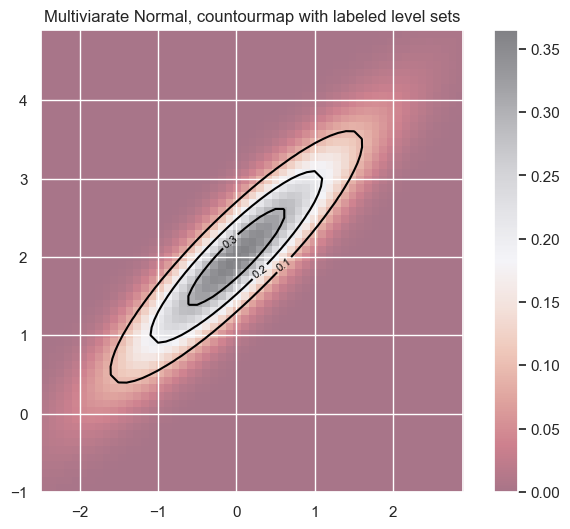

In [12]:
# contour plot with colors and level sets
contours = plt.contour(X, Y, Z, 3, colors='black') # create black countors
plt.clabel(contours, inline=True, fontsize=8) # add countors with labels
plt.imshow(Z, extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower',
           cmap='RdGy', alpha=0.5) # add background color
plt.colorbar();
plt.title('Multiviarate Normal, countourmap with labeled level sets');

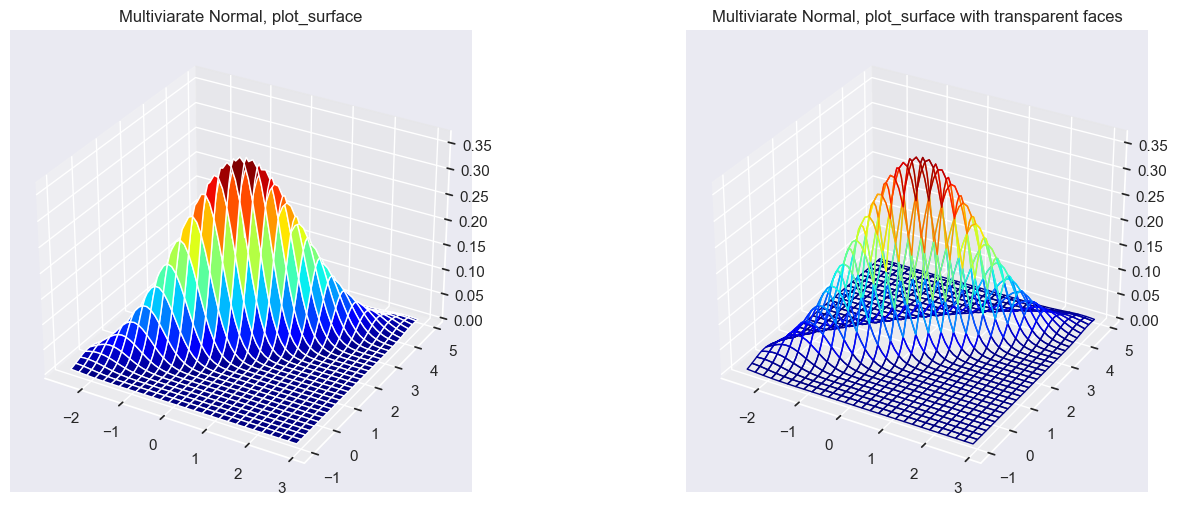

In [13]:
plt.rcParams['figure.figsize'] = [16,6] # set the figure size for the plots

# 3D plot using a grid
ax1 = plt.subplot(1, 2, 1, projection='3d') # layout to make 1 row, 2 columns of plots, and create to location 2.
ax1.plot_surface(X, Y, Z, cmap='jet');
ax1.set_title('Multiviarate Normal, plot_surface');

# 3D plot using a colored grid and transparent faces 
from matplotlib import cm# Normalize the colors based on Z value
ax2 = plt.subplot(1, 2, 2, projection='3d') # layout to make 1 row, 2 columns of plots, and create to location 2.
norm = plt.Normalize(Z.min(), Z.max())
colors = cm.jet(norm(Z))
surf = ax2.plot_surface(X, Y, Z, facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
ax2.set_title('Multiviarate Normal, plot_surface with transparent faces');

# Mutivariate t-Distribution

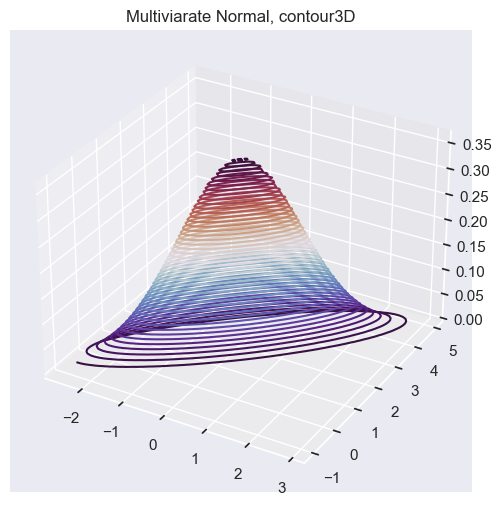

In [14]:
plt.rcParams['figure.figsize'] = [8, 6] # set the figure size for the plots
# 3d plot using level-set countours
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 55, cmap='twilight_shifted');
ax.set_title('Multiviarate Normal, contour3D');

In [15]:
# scipy does not have a multivariate t-distribution.  we have to create the function for it
from math import gamma

def multivariate_t_pdf(x, mu, Sigma, df):
    '''
    Multivariate t-student density. Returns the density
    of the function at points specified by x.

    input:
        x = parameter (n-d numpy array; will be forced to 2d)
        mu = mean (d dimensional numpy array)
        Sigma = scale matrix (dxd numpy array)
        df = degrees of freedom
    
    Edited from https://stackoverflow.com/questions/29798795/multivariate-student-t-distribution-with-python
    which previously edited from Edited from: http://stackoverflow.com/a/29804411/3521179
    '''
    x = np.atleast_2d(x) # requires x as 2d
    nD = Sigma.shape[0] # dimensionality
    numerator = gamma(1.0 * (nD + df) / 2.0)
    denominator = (
            gamma(1.0 * df / 2.0) * 
            np.power(df * np.pi, 1.0 * nD / 2.0) *  
            np.power(np.linalg.det(Sigma), 1.0 / 2.0) * 
            np.power(
                1.0 + (1.0 / df) *
                np.diagonal(
                    np.dot( np.dot(x - mu, np.linalg.inv(Sigma)), (x - mu).T)
                ), 
                1.0 * (nD + df) / 2.0
                )
            )
    return 1.0 * numerator / denominator 

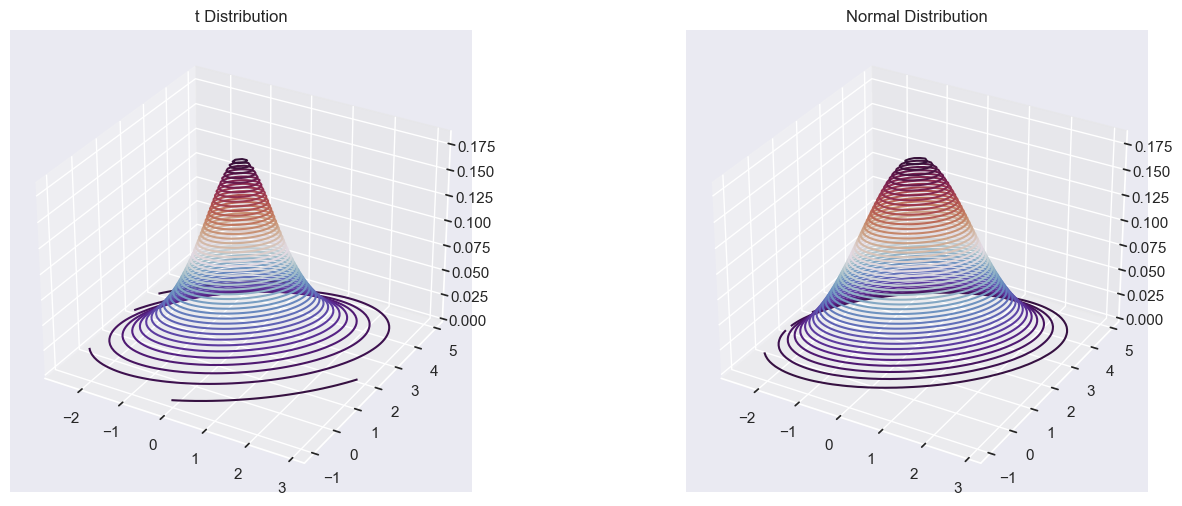

In [16]:
# Generate Mulitvariate Gaussian Data and plot with Seaborn
plt.rcParams['figure.figsize'] = [16,6] # set the figure size for the plots
sample_size = 100
param_mean = np.asarray([0, 2])
param_cov = np.asarray([(1, .5), (.5, 1)])
param_df = 1.5

X, Y = np.meshgrid(np.arange(-2.5, 3, 0.1), np.arange(-1, 5, 0.1))
pos = np.dstack((X,Y))
# Compute the PDF at the grid values
Z = multivariate_t_pdf(np.reshape(pos,[60*55,2]), param_mean, param_cov, param_df);
Z = np.reshape(Z,[60,55])

# T-DISTRIBUTION
ax1 = plt.subplot(1, 2, 1, projection='3d') # layout to make 1 row, 2 columns of plots, and create to location 2.
# 3d plot using level-set countours
ax1.contour3D(X, Y, Z, 55, cmap='twilight_shifted');
ax1.set_title('t Distribution');

# NORMAL DISTRIBUTION
ax2 = plt.subplot(1, 2, 2, projection='3d') # layout to make 1 row, 2 columns of plots, and create to location 2.
# Compute the PDF at the grid values
Z_n = multivariate_normal.pdf(pos, mean=param_mean, cov=param_cov);
# 3d plot using level-set countours
ax2.contour3D(X, Y, Z_n, 55, cmap='twilight_shifted');
ax2.set_title('Normal Distribution');

# Dirichlet Distribution:

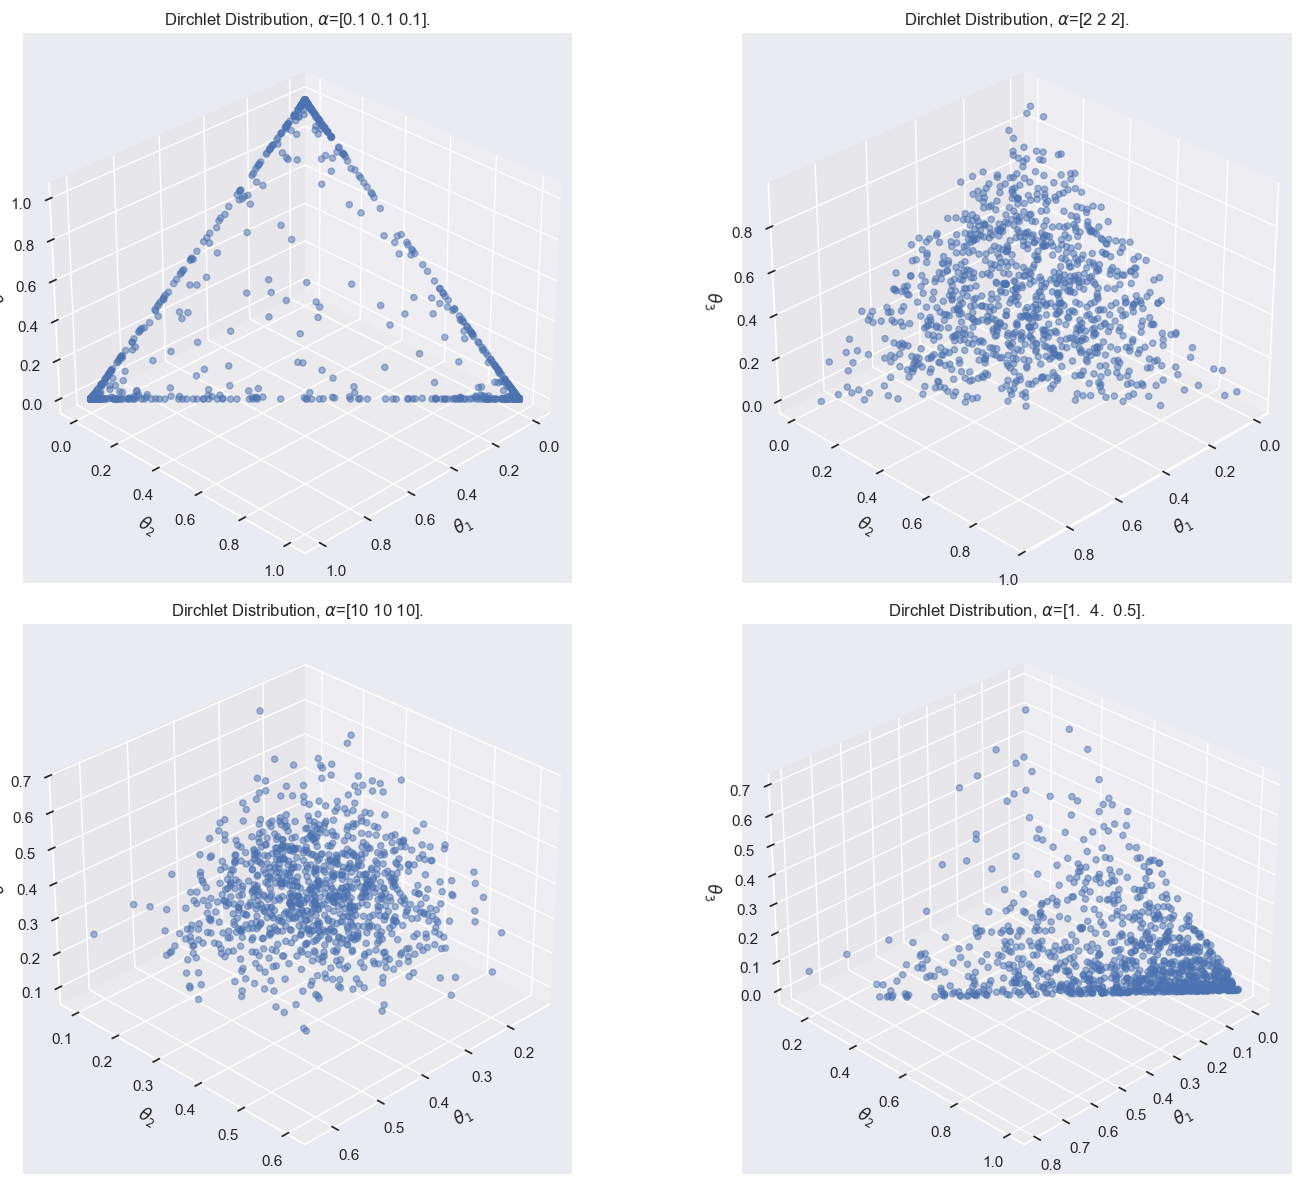

In [17]:
from scipy.stats import dirichlet
plt.rcParams['figure.figsize'] = [16,12] # set the figure size for the plots
sample_size = 1000

ax1 = plt.subplot(2, 2, 1, projection='3d') # layout to make 1 row, 2 columns of plots, and create to location 2.
alpha = np.array([.1,.1,.1])  # specify concentration parameters
data = dirichlet.rvs(alpha=alpha, size=sample_size)
ax1.scatter(data[:,0],data[:,1],data[:,2], alpha=0.5);
ax1.set_xlabel(r'$\theta_1$')
ax1.set_ylabel(r'$\theta_2$')
ax1.set_zlabel(r'$\theta_3$')
ax1.set_title(rf'Dirchlet Distribution, $\alpha$={alpha}.')
ax1.view_init(30, 45)

ax2 = plt.subplot(2, 2, 2, projection='3d') # layout to make 1 row, 2 columns of plots, and create to location 2.
alpha = np.array([2,2,2])  # specify concentration parameters
data = dirichlet.rvs(alpha=alpha, size=sample_size)
ax2.scatter(data[:,0],data[:,1],data[:,2], alpha=0.5);
ax2.set_xlabel(r'$\theta_1$')
ax2.set_ylabel(r'$\theta_2$')
ax2.set_zlabel(r'$\theta_3$')
ax2.set_title(rf'Dirchlet Distribution, $\alpha$={alpha}.')
ax2.view_init(30, 45)

ax3 = plt.subplot(2, 2, 3, projection='3d') # layout to make 1 row, 2 columns of plots, and create to location 2.
alpha = np.array([10,10,10])  # specify concentration parameters
data = dirichlet.rvs(alpha=alpha, size=sample_size)
ax3.scatter(data[:,0],data[:,1],data[:,2], alpha=0.5);
ax3.set_xlabel(r'$\theta_1$')
ax3.set_ylabel(r'$\theta_2$')
ax3.set_zlabel(r'$\theta_3$')
ax3.set_title(rf'Dirchlet Distribution, $\alpha$={alpha}.')
ax3.view_init(30, 45)


ax4 = plt.subplot(2, 2, 4, projection='3d') # layout to make 1 row, 2 columns of plots, and create to location 2.
alpha = np.array([1,4,0.5])  # specify concentration parameters
data = dirichlet.rvs(alpha=alpha, size=sample_size)
ax4.scatter(data[:,0],data[:,1],data[:,2], alpha=0.5);
ax4.set_xlabel(r'$\theta_1$')
ax4.set_ylabel(r'$\theta_2$')
ax4.set_zlabel(r'$\theta_3$')
ax4.set_title(rf'Dirchlet Distribution, $\alpha$={alpha}.')
ax4.view_init(30, 45)

plt.tight_layout()